In [1]:
%load_ext autoreload
%autoreload 2
import geopandas as gpd
import geosnap
import segregation

/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
geosnap.metros[geosnap.metros.name.str.startswith('Baltimore')]

,geoid,name,type,geometry
765,12580,"Baltimore-Columbia-Towson, MD",Metro Area,"POLYGON ((-77.16808 39.353957, -77.16831499999..."


In [3]:
balt = geosnap.data.Community(source='ltdb', cbsafips='12580')

In [ ]:
balt_network = segregation.network.get_network(balt.tracts, quiet=False)

In [8]:
gdf = balt.tracts.merge(balt.census[balt.census.year==2010], left_on='geoid', right_index=True, how='left')

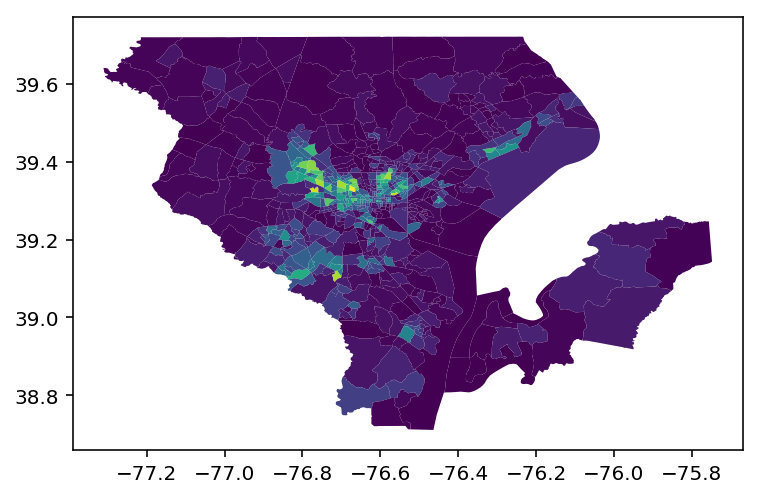

In [9]:
gdf.plot('n_nonhisp_black_persons')

In [15]:
balt_access = segregation.network.calc_access(gdf, network=balt_network, distance=2000, group_population='n_nonhisp_black_persons', total_population='n_total_pop')

In [18]:
balt_access.describe()

,total_population,group_population
count,642743.000000,642743.000000
mean,2243.131124,941.022434
std,5569.834322,3452.306378
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,589.419138,21.060042
max,43358.183590,33574.241007


In [19]:
balt_access.index

Int64Index([    234661,     246574,     275232,     275233,     275234,
                275235,     275239,     275244,     281359,     281365,
            ...
            6524697297, 6524697298, 6524697299, 6524697302, 6524697303,
            6524697304, 6524697305, 6524697309, 6524697310, 6524697311],
           dtype='int64', name='id', length=642743)

In [20]:
from segregation.aspatial import Dissim

In [22]:
Dissim(balt_access, group_pop_var='group_population', total_pop_var='total_population').statistic

/Users/knaaptime/projects/segregation/segregation/aspatial/aspatial_indexes.py:77: RuntimeWarning: invalid value encountered in true_divide
  pi = np.where(t == 0, 0, x / t)


0.5656456804396954

In [25]:
Dissim(gdf, group_pop_var='n_nonhisp_black_persons', total_pop_var='n_total_pop').statistic

/Users/knaaptime/projects/segregation/segregation/aspatial/aspatial_indexes.py:77: RuntimeWarning: invalid value encountered in true_divide
  pi = np.where(t == 0, 0, x / t)


0.6242120049051882

In [26]:
balt_access

,total_population,group_population
id,,
234661,0.000000,0.000000
246574,0.000000,0.000000
275232,0.000000,0.000000
275233,0.000000,0.000000
275234,0.000000,0.000000
275235,0.000000,0.000000
275239,0.000000,0.000000
275244,0.000000,0.000000
281359,0.000000,0.000000


(<mpl_toolkits.basemap.Basemap at 0x18316ff60>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdbc5eb8>)

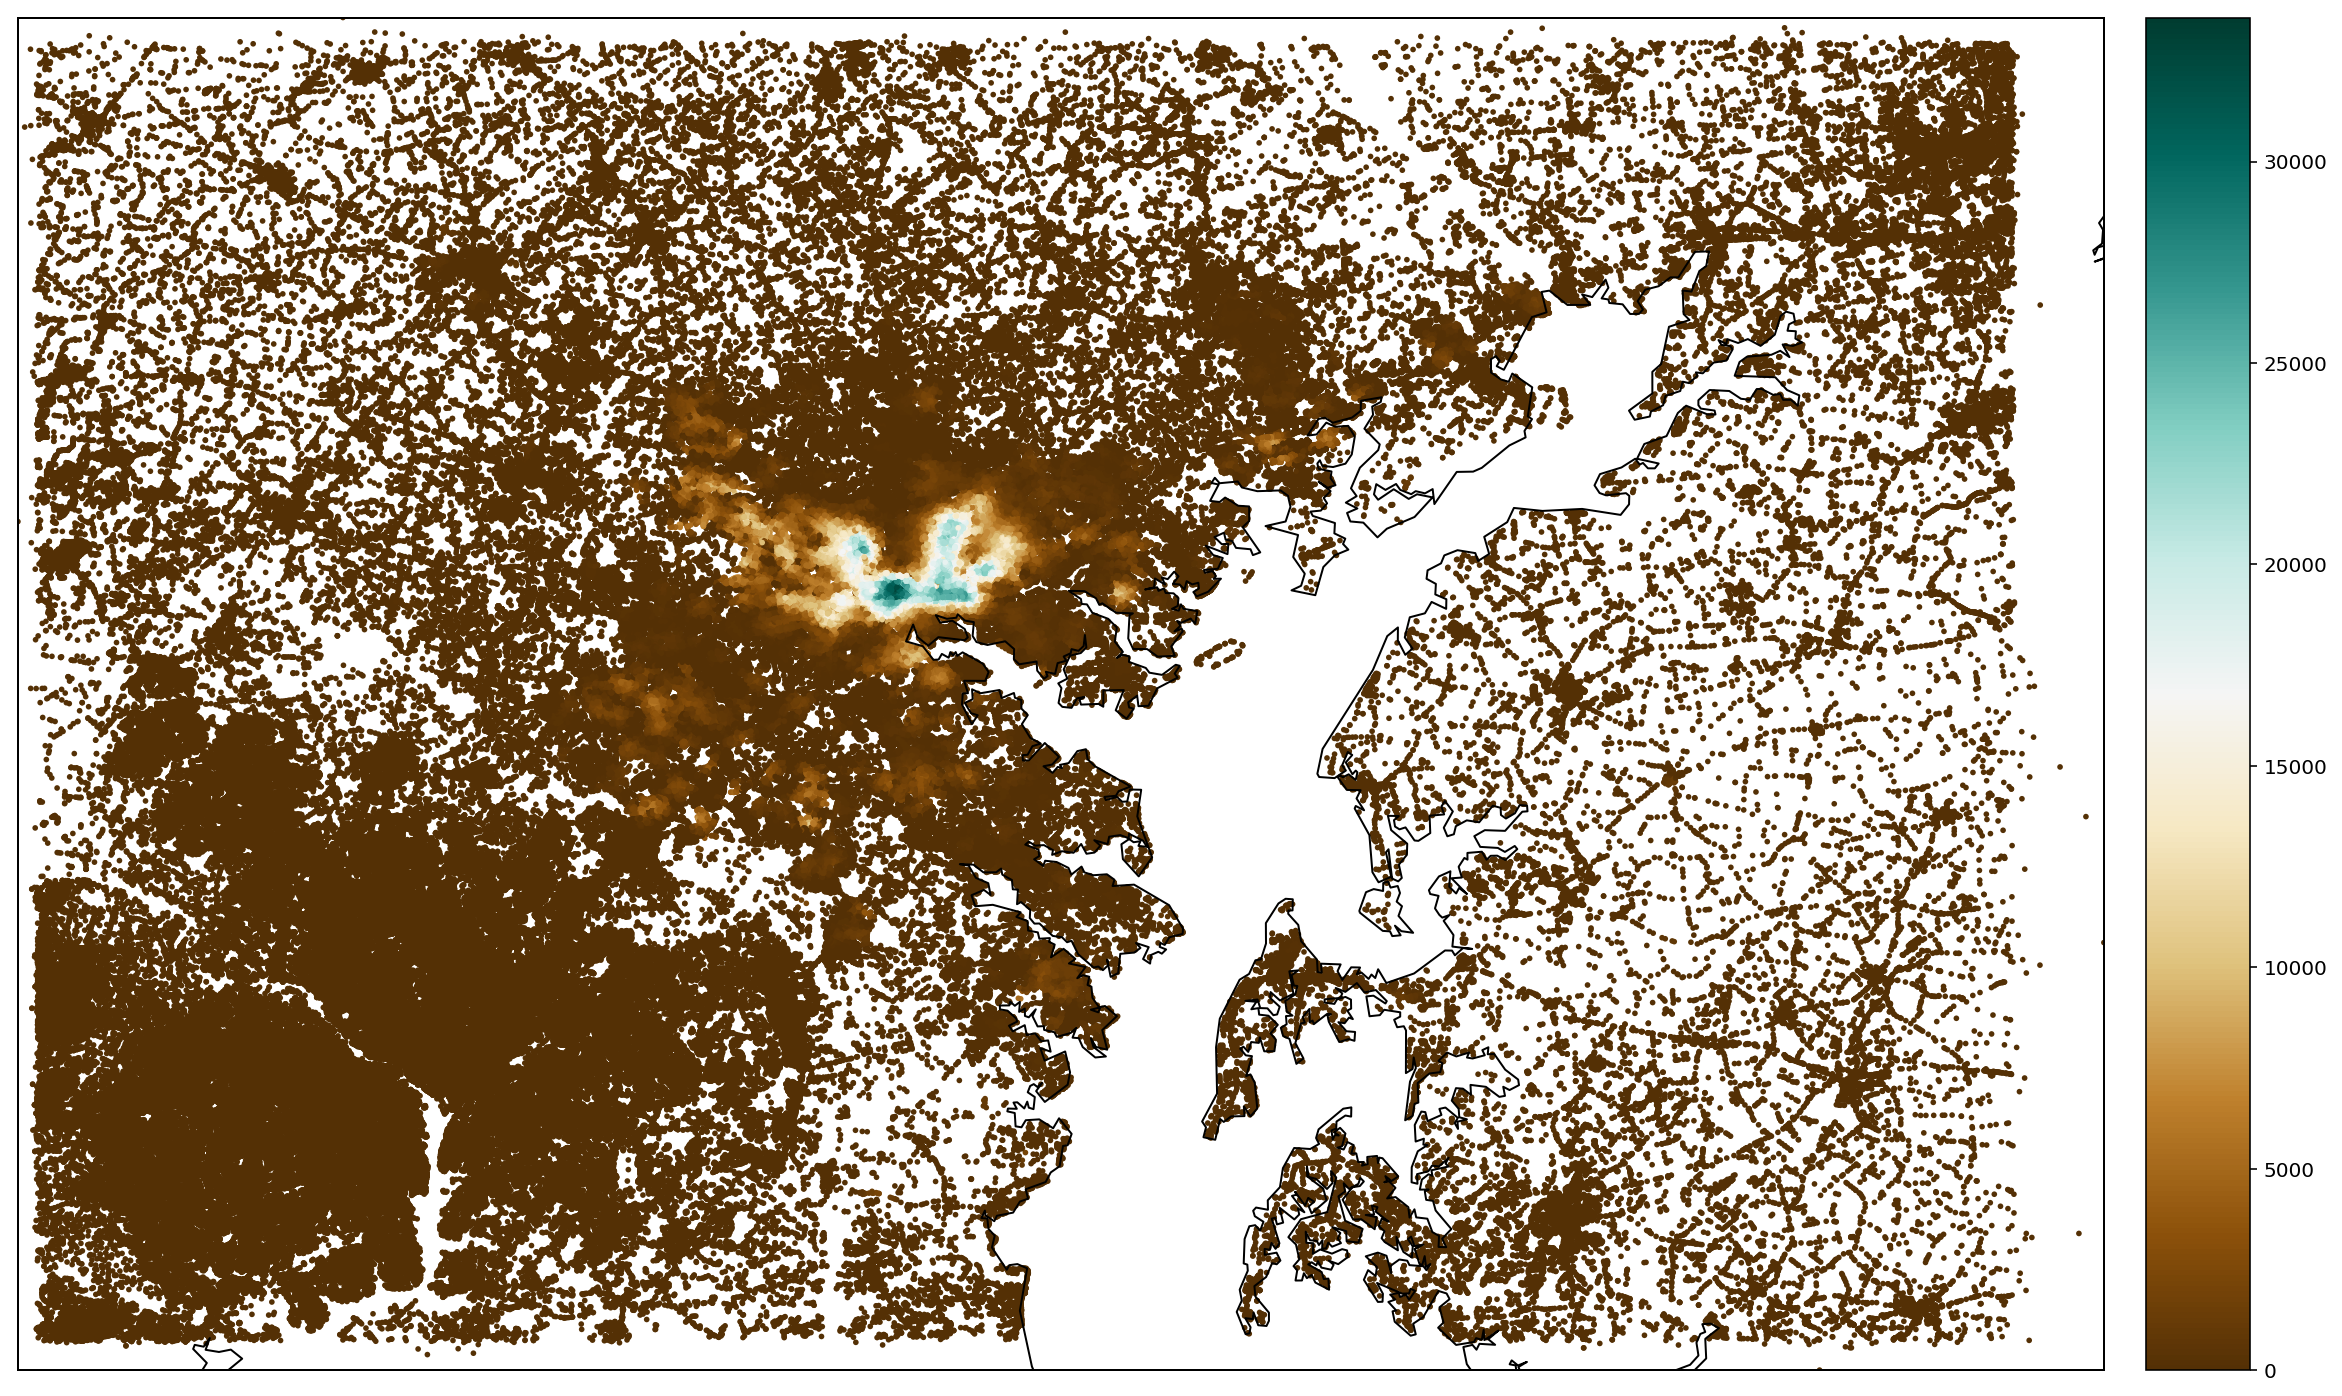

In [41]:
balt_network.plot(balt_access.group_population,
                 fig_kwargs={'figsize': [20, 20]},
                 bmap_kwargs={'suppress_ticks': True,
                              'resolution': 'h'},
                 plot_kwargs={'cmap': 'BrBG', 's': 8, 'edgecolor': 'none'})
